# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('/Users/yul/Desktop/LP Player/3. LP Player_데이터 및 모델 세이브 파일/LPOINT_BIG_COMP_02_PDDE.csv')
data2 = pd.read_csv('/Users/yul/Desktop/LP Player/3. LP Player_데이터 및 모델 세이브 파일/LPOINT_BIG_COMP_04_PD_CLAC.csv')
np.random.seed(19670324)  # seed 값 지정

/var/folders/6z/_hbzx8ln77jg3b982qzcp4xh0000gn/T/ipykernel_32056/3294059208.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('/Users/yul/Desktop/LP Player/3. LP Player_데이터 및 모델 세이브 파일/LPOINT_BIG_COMP_02_PDDE.csv')


# 데이터 병합

In [2]:
data = pd.merge(data1, data2, on='pd_c', how='inner')
data.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의
1,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의
4,M506355556,A01000107137,1,A01,A010032,PD0290,20210101,15,199000.0,1,남성티셔츠,남성의류,남성의류상의


In [3]:
# 필요한 열만 추출
data = data[['cust', 'pd_nm', 'buy_ct']]
data.head()

,cust,pd_nm,buy_ct
0,M430112881,남성티셔츠,1
1,M430112881,남성티셔츠,1
2,M430112881,남성티셔츠,1
3,M430112881,남성티셔츠,1
4,M506355556,남성티셔츠,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4381743 entries, 0 to 4381742
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   cust    object
 1   pd_nm   object
 2   buy_ct  int64 
dtypes: int64(1), object(2)
memory usage: 133.7+ MB


# 데이터 전처리 (정규화)

In [5]:
#정규화 함수 및 적용 
def min_max_scaler(df):
    df_min = df.min()
    df_max = df.max()
    return (df-df_min)/(df_max-df_min)

data['buy_ct'] = min_max_scaler(data['buy_ct'])

<AxesSubplot:ylabel='Frequency'>

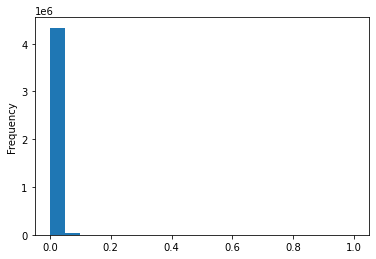

In [6]:
(data['buy_ct']).plot.hist(bins=20)

# 고객, 상품별로 데이터 묶기

In [7]:
data_groupby = data.groupby(['cust','pd_nm'], as_index=False)
data_groupby = data_groupby.sum()
data_groupby.head()

,cust,pd_nm,buy_ct
0,M000034966,가공조미료,0.000000
1,M000034966,간장,0.000000
2,M000034966,감자스낵,0.000000
3,M000034966,과일음료,0.000000
4,M000034966,국산맥주,0.040404


In [8]:
print("shape:",data_groupby.shape)
print("중복 데이터:", data_groupby.duplicated().sum())

shape: (1637598, 3)
중복 데이터: 0


In [9]:
data_groupby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637598 entries, 0 to 1637597
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   cust    1637598 non-null  object 
 1   pd_nm   1637598 non-null  object 
 2   buy_ct  1637598 non-null  float64
dtypes: float64(1), object(2)
memory usage: 37.5+ MB


In [10]:
data_groupby.isnull().sum() # 결측치 확인

cust      0
pd_nm     0
buy_ct    0
dtype: int64

# 데이터 저장

In [11]:
# 데이터를 빠르게 로드할 수 있게 피클로 저장
data_groupby.to_pickle('/Users/yul/Desktop/LP Player/3. LP Player_데이터 및 모델 세이브 파일/Item-based_filtering_data_pickle_최종')